# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [58]:
## not implemented
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 

In [59]:
PATH_DATASET = "data/UCI HAR Dataset/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

#estructura
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [93]:
def standarize(df):
    #hago una copia del vector
    df_p = df.copy()
    #obtengo la media y el desvío standard para normalizar
    df_mean = df_p.mean(axis=0)
    df_std = df_p.std(axis=0)
    # ajusto los datos
    df_p = (df_p - df_mean) / df_std
    # retorno los datos normalizados
    return df_p

class PCA:
    
    def fit(self, components, x_scaled):       
        #guardo components
        self.components = components
        #hago una copia
        self.x = x_scaled.copy()
        #obtengo la matriz covarianza
        cov_mat = np.cov(self.x.T)
        #obtengo los autovalores y autovectores de la matriz de covarianza
        auto_valores, auto_vectores = np.linalg.eig(cov_mat)
       
        # ordeno los indices en orden creciente
        self.auto_indices = np.argsort(auto_valores)
        # ordeno los autovectores con los indices
        self.auto_vectores_sorted = auto_vectores[:,self.auto_indices]
                    
        varianza = []
        for i in auto_valores:
            varianza.append((i/sum(auto_valores)).astype(float))

        return varianza[:self.components]

    def transform(self, x_scaled):
        proyeccion = self.auto_vectores_sorted
        proyeccion = proyeccion[:self.components].T

        return x_scaled.dot(proyeccion)

/tmp/ipykernel_781385/2115683329.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  varianza.append((i/sum(auto_valores)).astype(float))


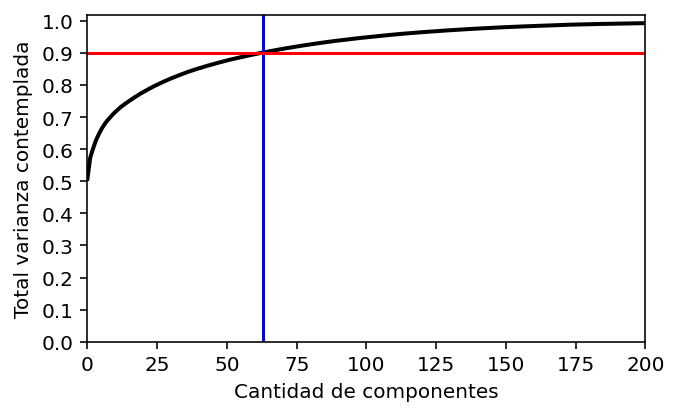

In [94]:
X_scaled = standarize(X_train)

pca = PCA()
varianza = pca.fit(200, X_scaled)

plt.figure(figsize=(5,3))
plt.plot(np.cumsum(varianza), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();


/tmp/ipykernel_781385/689871188.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  varianza.append((i/sum(auto_valores)).astype(float))


varianza2:63


/home/santiago/.local/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


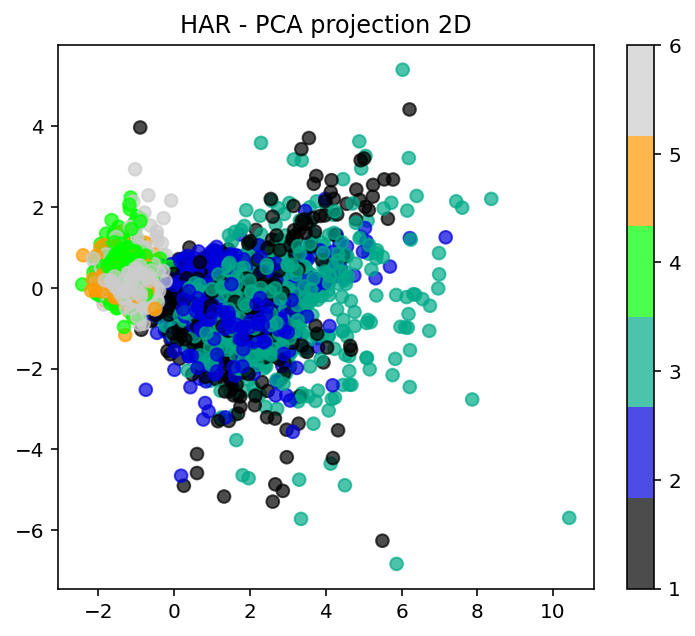

In [92]:

varianza2 = pca.fit(63, X_scaled)
X_pca = pca.transform(X_scaled)

# Graficamos los primeros dos componentes
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');


In [88]:
X_pca[0:2, 0:2] *13.688

array([[-16.13803115+5.75730510e-08j,   1.1214874 +1.61752689e-08j],
       [-16.55050475-3.31122669e-09j,  11.255121  +3.62871590e-08j]])

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [66]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import make_blobs

In [67]:
class KMeans:

    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
    
    def fit(self, X):

        
        # Initialize our centroids by picking random data points
        centroids = self.init_clusters(X, self.n_clusters)

        # Initialize the vectors in which we will store the
        # assigned classes of each data point and the
        # calculated distances from each centroid
        self.labels_ = np.zeros(X.shape[0], dtype=np.float64)
        distances = np.zeros([X.shape[0], self.n_clusters], dtype=np.float64)

        # Loop for the maximum number of iterations
        for i in range(self.n_init):

            # Assign all points to the nearest centroid
            for i, c in enumerate(centroids):
                distances[:, i] = self.get_distances(c, X)

            # Determine class membership of each point
            # by picking the closest centroid
            self.labels_ = np.argmin(distances, axis=1)

            # Update centroid location using the newly
            # assigned data point classes
            for c in range(self.n_clusters):
                centroids[c] = np.mean(X[self.labels_ == c], 0)
    
    def init_clusters(self, p, k):
        """init clusters """
        return p[np.random.randint(p.shape[0], size=k)]
    
    def get_distances(self, centroid, p):
        return np.linalg.norm(p - centroid, axis=1)

Text(0.5, 1.0, 'HAR - PCA projection 2D')

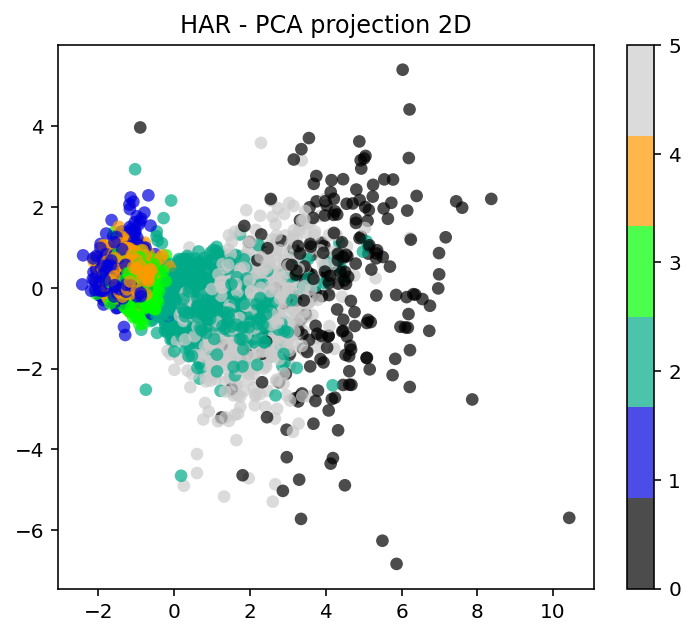

In [69]:
kmeans = KMeans(n_clusters=6, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
                           
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D')

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [ ]:
# not implemented

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [98]:
import tensorflow as tf
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17


In [99]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))


In [100]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
#X_scaled = x_train

In [104]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)


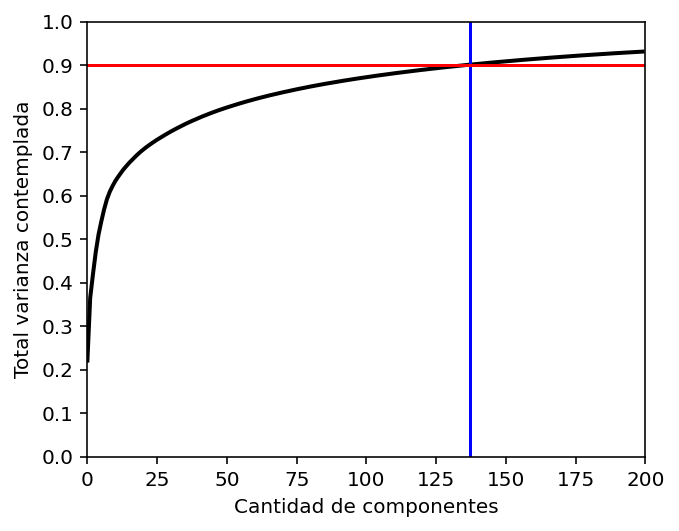

Se captura el 90% con 137 componentes principales


In [105]:

num_components = pca.explained_variance_ratio_.shape[0]
plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(137, c='b')
plt.axhline(0.9, c='r')
plt.show();

print("Se captura el 90% con {} componentes principales".format(num_components))


In [106]:
kmeans = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

array([2, 3, 7, 1, 9, 0, 6, 0, 7, 7, 3, 8, 6, 7, 6, 2, 9, 3, 0, 7],
      dtype=int32)

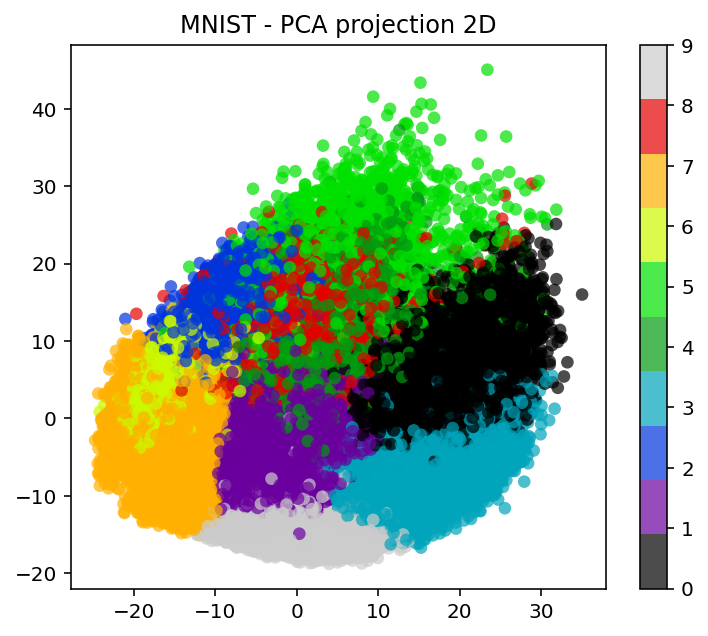

In [108]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D');